You are given an array books where books[i] = [thicknessi, heighti] indicates the thickness and height of the ith book. You are also given an integer shelfWidth.

We want to place these books in order onto bookcase shelves that have a total width shelfWidth.

We choose some of the books to place on this shelf such that the sum of their thickness is less than or equal to shelfWidth, then build another level of the shelf of the bookcase so that the total height of the bookcase has increased by the maximum height of the books we just put down. We repeat this process until there are no more books to place.

Note that at each step of the above process, the order of the books we place is the same order as the given sequence of books.

    For example, if we have an ordered list of 5 books, we might place the first and second book onto the first shelf, the third book on the second shelf, and the fourth and fifth book on the last shelf.

Return the minimum possible height that the total bookshelf can be after placing shelves in this manner.

 

Example 1:

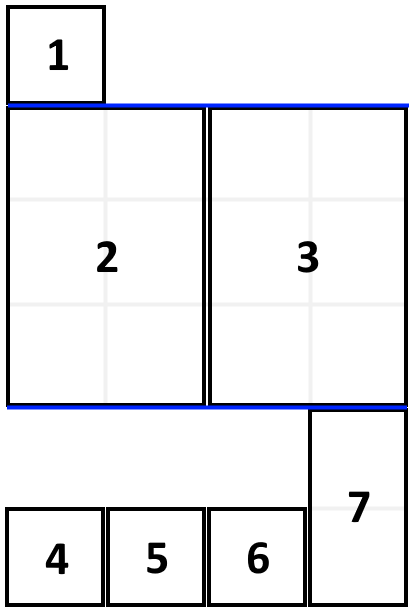

Input: books = [[1,1],[2,3],[2,3],[1,1],[1,1],[1,1],[1,2]], shelfWidth = 4
Output: 6
Explanation:
The sum of the heights of the 3 shelves is 1 + 3 + 2 = 6.
Notice that book number 2 does not have to be on the first shelf.

Example 2:

Input: books = [[1,3],[2,4],[3,2]], shelfWidth = 6
Output: 4

 

Constraints:

    1 <= books.length <= 1000
    1 <= thicknessi <= shelfWidth <= 1000
    1 <= heighti <= 1000



In [ ]:
class Solution:
    def minHeightShelves(self, books: List[List[int]], shelfWidth: int) -> int:
        n = len(books)
        # dp[i] will store the minimum height of the bookcase containing all
        # books up to and excluding i
        dp = [0] * (n + 1)

        # Base cases
        dp[0] = 0
        dp[1] = books[0][1]

        for i in range(2, n + 1):
            # new shelf built to hold current book
            remaining_shelf_width = shelfWidth - books[i - 1][0]
            max_height = books[i - 1][1]
            dp[i] = books[i - 1][1] + dp[i - 1]

            j = i - 1
            # calculate the height when previous books are added to new shelf
            while j > 0 and remaining_shelf_width - books[j - 1][0] >= 0:
                max_height = max(max_height, books[j - 1][1])
                remaining_shelf_width -= books[j - 1][0]
                dp[i] = min(dp[i], max_height + dp[j - 1])
                j -= 1

        return dp[n]

In [ ]:
class Solution:
    def minHeightShelves(self, books: List[List[int]], shelfWidth: int) -> int:
        # Cache to store previous computations
        memo = [[0 for _ in range(shelfWidth + 1)] for _ in range(len(books))]
        return self._dpHelper(books, shelfWidth, memo, 0, shelfWidth, 0)

    def _dpHelper(
        self, books, shelf_width, memo, i, remaining_shelf_width, max_height
    ):
        current_book = books[i]
        max_height_updated = max(max_height, current_book[1])
        if i == len(books) - 1:
            # For the last book, store it on the current shelf if possible,
            # or start a new shelf with it
            if remaining_shelf_width >= current_book[0]:
                return max_height_updated
            return max_height + current_book[1]
        if memo[i][remaining_shelf_width] != 0:
            return memo[i][remaining_shelf_width]
        else:
            # Calculate height of the bookcase if we put the current book on the new shelf
            option_1_height = max_height + self._dpHelper(
                books,
                shelf_width,
                memo,
                i + 1,
                shelf_width - current_book[0],
                current_book[1],
            )
            if remaining_shelf_width >= current_book[0]:
                # Calculate height of the bookcase if we put the current book on the current shelf
                option_2_height = self._dpHelper(
                    books,
                    shelf_width,
                    memo,
                    i + 1,
                    remaining_shelf_width - current_book[0],
                    max_height_updated,
                )
                # Store result in cache
                memo[i][remaining_shelf_width] = min(
                    option_1_height, option_2_height
                )
                return memo[i][remaining_shelf_width]
            memo[i][remaining_shelf_width] = option_1_height
            return memo[i][remaining_shelf_width]